#Introduction

The objective of this project is to explore the relationship between trader performance and market sentiment, uncover hidden patterns, and deliver insights that can drive smarter trading  strategies using two primary datasets:



*   Bitcoin Market Sentiment Dataset
*   Historical Trader Data from Hyperliquid

The goal is to analyze whether market sentiment impacts trader outcomes, identify potential patterns in trading behavior, and provide actionable insights that could support smarter trading strategies.

This project involves:


*  Data cleaning and preprocessing for both datasets.
*  Exploratory data analysis (EDA) to visualize trends, distributions, and correlations.

*  Simple predictive modeling to estimate trader profit/loss based on sentiment and trading metrics.
*  Discussion of results and suggestions for future improvements to enhance prediction accuracy.






#Import the libraries

In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

#Loading both the datasets

In [319]:
# Loading the Bitcoin Market Sentiment Dataset

df_greed = pd.read_csv("fear_greed_index.csv")
df_greed.head(5)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [320]:
#Loading the Historical Trader Data from Hyperliquid

df_hist = pd.read_csv("historical_data.csv")
df_hist.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [321]:
#Number of rows and columns in the Bitcoin Market Sentiment Dataset

print(f"Number of rows is {df_greed.shape[0]} and number of columns is {df_greed.shape[1]}")


Number of rows is 2644 and number of columns is 4


In [322]:
#Number of rows and columns in the Historical Trader Data from Hyperliquid

print(f"Number of rows is {df_hist.shape[0]} and number of columns is {df_hist.shape[1]}")


Number of rows is 211224 and number of columns is 16


#Data Preprocessing

## Null Values

In [323]:
#Checking for Null values in the Bitcoin Market Sentiment Dataset

df_greed.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [324]:
#Checking for null values in the historical Trader Data

df_hist.isnull().sum()


,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


Based on the above results, we can see that both the datasets have zero null values.

In [325]:
#Checking for data duplications in both the datasets

print("Sentiment data duplicates:", df_greed.duplicated().sum())
print("Historical data duplicates:", df_hist.duplicated().sum())

Sentiment data duplicates: 0
Historical data duplicates: 0


No data Duplications found.

# Outliers

Exploring the distribution of the 'value' column in df_greed, which represents the daily sentiment score (0–100). This helps in understanding how sentiment values are spread and if there are any potential outliers.

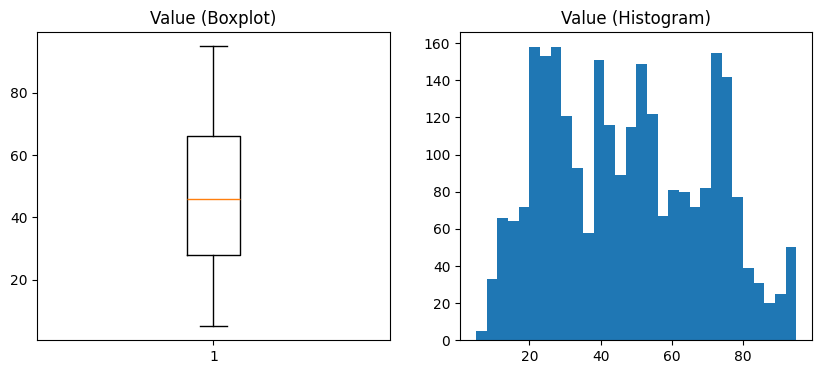

In [326]:
#Bitcoin Market Sentiment Dataset

#Generates a boxplot

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.boxplot(df_greed['value'])
plt.title("Value (Boxplot)")

#Generates a histplot

plt.subplot(1,2,2)
plt.hist(df_greed['value'], bins=30)
plt.title("Value (Histogram)")
plt.show()

* The histogram shows how sentiment values are spread across the dataset using 30 bins. Most values fall between 10 and 90, with a few peaks where sentiment tends to concentrate. There aren’t many extremely low or high bars at the edges, which means outlier sentiment values are pretty rare or mostly absent in this sample.


* The histogram shows the frequency of sentiment values divided into 30 bins. Most values are fairly evenly spread between 10 and 90, with peaks at several intervals, indicating common sentiment levels. There are no extreme bars at the edges, suggesting that outlier sentiment values are rare or absent in this dataset.

In [327]:
# Check percentiles
print(df_greed['value'].describe(percentiles=[0.01,0.05,0.95,0.99]))



count    2644.000000
mean       46.981089
std        21.827680
min         5.000000
1%         10.000000
5%         15.000000
50%        46.000000
95%        82.000000
99%        93.000000
max        95.000000
Name: value, dtype: float64


Looking at the stats for the sentiment values: we have 2,644 entries, with an average around 47 and a standard deviation of about 22. Most values fall between 10 and 90, with the median right at 46. Extreme values are rare — the minimum is 5, the maximum is 95, and only a small fraction of values lie below 10 or above 90. This tells us that most of the sentiment scores are pretty moderate.

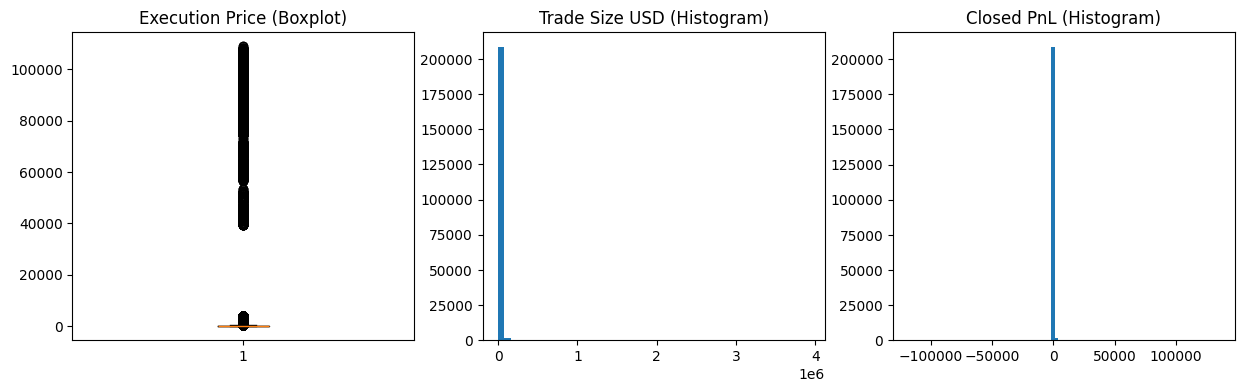

In [328]:
# Historical Data Dataset (df_hist)

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.boxplot(df_hist['Execution Price'])
plt.title("Execution Price (Boxplot)")

plt.subplot(1,3,2)
plt.hist(df_hist['Size USD'], bins=50)
plt.title("Trade Size USD (Histogram)")

plt.subplot(1,3,3)
plt.hist(df_hist['Closed PnL'], bins=100)
plt.title("Closed PnL (Histogram)")
plt.show()

* Execution Price: Shows the distribution of trade prices. Most trades clusters are at the lower end, with a few unusually high or low trades as outliers.

* Trade Size USD: The left most tall bar indicates that majority of the trades are very small, with only a few large trades.

* Closed PnL:  Most trades cluster around zero, showing that they break even. Only a small number of trades result in large profits or losses, indicating that big gains or losses are rare.


Overall: The dataset mainly consists of small, routine trades, with rare extreme values in price, size and PnL.

##Converting to datetime format

Converted the timestamp columns in both datasets into datetime format so it makes it easier to work dates. This makes it simple to do things like group by day, plot trends over time, and merge the datasets on dates.

In [329]:
# Converting the timestamp columns to datetime format

df_greed['datetime'] = pd.to_datetime(df_greed['timestamp'], unit='s')

df_hist['datetime'] = pd.to_datetime(df_hist['Timestamp'], unit='ms')


In [330]:
df_greed.head(5)


,timestamp,value,classification,date,datetime
0,1517463000,30,Fear,2018-02-01,2018-02-01 05:30:00
1,1517549400,15,Extreme Fear,2018-02-02,2018-02-02 05:30:00
2,1517635800,40,Fear,2018-02-03,2018-02-03 05:30:00
3,1517722200,24,Extreme Fear,2018-02-04,2018-02-04 05:30:00
4,1517808600,11,Extreme Fear,2018-02-05,2018-02-05 05:30:00


In [331]:
# Checking data types for Bitcoin Market Sentiment Dataset

df_greed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   object        
 4   datetime        2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 103.4+ KB


In [332]:
df_hist.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,datetime
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27 03:33:20
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27 03:33:20


In [333]:
# Checking data types for Historical Data Dataset

df_hist.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

#Exploratory Data Analysis


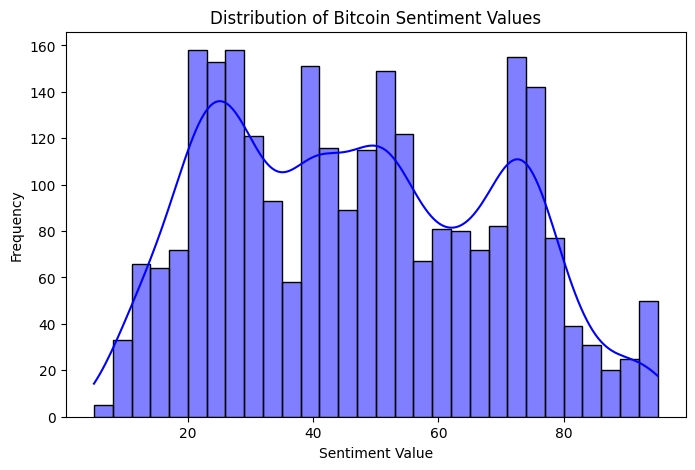

/tmp/ipython-input-3541081667.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='classification', data=df_greed, palette='Set2')


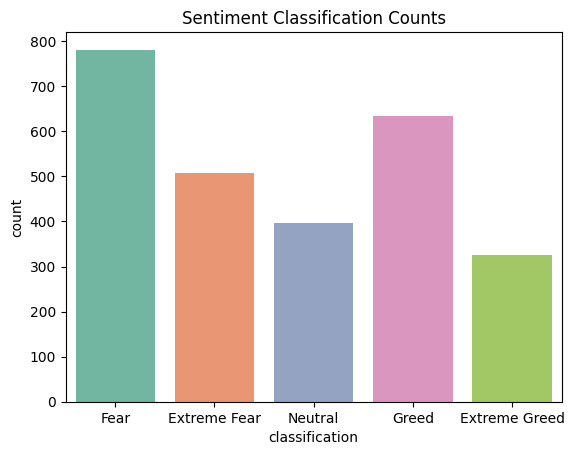

In [334]:
# For Bitcoin Market Sentiment Dataset

# Distribution of sentiment values
plt.figure(figsize=(8,5))
sns.histplot(df_greed['value'], bins=30, kde=True, color='blue')
plt.title('Distribution of Bitcoin Sentiment Values')
plt.xlabel('Sentiment Value')
plt.ylabel('Frequency')
plt.show()

# Count of sentiment classifications
sns.countplot(x='classification', data=df_greed, palette='Set2')
plt.title('Sentiment Classification Counts')
plt.show()

* The top diagram shows a histogram of Bitcoin sentiment values with a smooth blue curve over it. The bars show how often each sentiment value appears, while the curve helps highlight the overall pattern. There are multiple peaks,  indicating several clusters in sentiment scores.

* The bottom diagram is a simple bar plot of sentiment categories like "Fear", "Extreme Fear", "Neutral", "Greed", and "Extreme Greed". The height of each bar shows how many times that sentiment occurs. From the plot, "Fear" shows up most often, then "Greed", followed by "Extreme Fear", "Neutral", and "Extreme Greed". This makes it easy to spot which market sentiments are dominating the conversation.

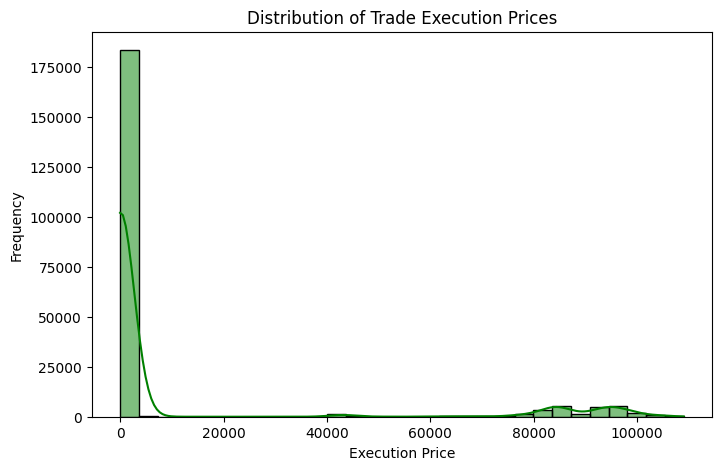

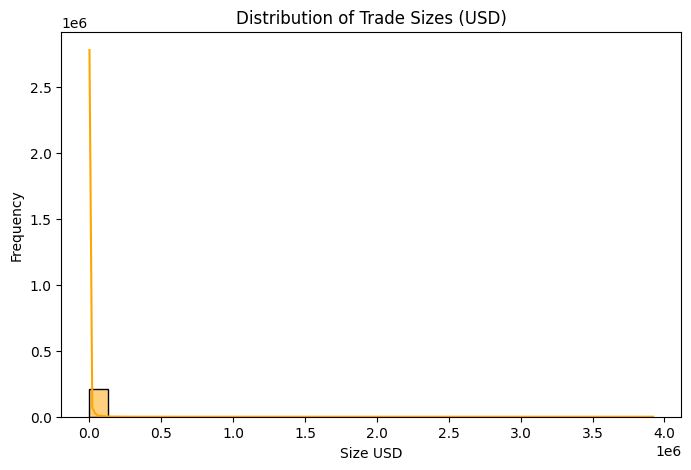

In [335]:
# For Historical Data Dataset

# Check distribution of execution prices
plt.figure(figsize=(8,5))
sns.histplot(df_hist['Execution Price'], bins=30, kde=True, color='green')
plt.title('Distribution of Trade Execution Prices')
plt.xlabel('Execution Price')
plt.ylabel('Frequency')
plt.show()

# Check distribution of trade sizes in USD
plt.figure(figsize=(8,5))
sns.histplot(df_hist['Size USD'], bins=30, kde=True, color='orange')
plt.title('Distribution of Trade Sizes (USD)')
plt.xlabel('Size USD')
plt.ylabel('Frequency')
plt.show()

* The first histogram shows how trade execution prices are spread out, with a smooth curve on top. The x-axis is the price, and the y-axis shows how often trades happened at that price. Most trades are clustered at really low prices as indicated by the tall bar on the left. Overall, execution prices are mostly low, with some occasional high outliers.

* The second histogram shows trade sizes in USD, again with a smooth curve. The x-axis is the trade size, and the y-axis is frequency. Almost all trades are tiny, close to zero (tall bar on the left), and only a handful are much larger. The distribution is very skewed, meaning most trades are small, with rare large ones.

##Merging the two datasets

In [336]:
# For Bitcoin Market Sentiment Dataset

#Converting data column to datetime
df_greed['date'] = pd.to_datetime(df_greed['date'], errors='coerce')

#Dropping rows with invalid dates
df_greed = df_greed.dropna(subset=['date'])

# Extracting only the date wihtout the time
df_greed['date_only'] = df_greed['date'].dt.date

# Aggregate daily sentiment
daily_sentiment = df_greed.groupby('date_only').agg({
    'value': 'mean'
}).reset_index()
daily_sentiment.rename(columns={'value':'avg_sentiment'}, inplace=True)

In [337]:
# For Historical Data Dataset

# Converting Timestamp IST column to datetime
df_hist['Timestamp IST'] = pd.to_datetime(df_hist['Timestamp IST'], dayfirst=True, errors='coerce')

# Drops rows with invalid timestamps
df_hist = df_hist.dropna(subset=['Timestamp IST'])

# Extracting only the date wihtout the time
df_hist['date_only'] = df_hist['Timestamp IST'].dt.date

# Aggregate daily trading metrics
daily_trades = df_hist.groupby('date_only').agg({
    'Execution Price': 'mean',
    'Size USD': 'sum',
    'Closed PnL': 'sum'
}).reset_index()

In [338]:
# Merging the two datasets by date
merged_data = pd.merge(daily_sentiment, daily_trades, on='date_only', how='inner')
merged_data.head()

,date_only,avg_sentiment,Execution Price,Size USD,Closed PnL
0,2023-05-01,63.0,1898.133333,477.00,0.000000
1,2023-12-05,75.0,11038.300000,50005.83,0.000000
2,2023-12-14,72.0,8031.868818,113203.35,-205.434737
3,2023-12-15,70.0,2.982000,10609.95,-24.632034
4,2023-12-16,67.0,0.384707,15348.77,0.000000


The daily sentiment data was merged with the daily trading data to examine the relationship between market sentiment and trading activity. From the merged dataset, avg_sentiment was kept to represent the daily sentiment level, Execution Price as the average trade price, Size USD as the total daily trade volume, and Closed PnL as the total daily profit or loss, serving as the target variable in case of predictive analysis. This combination enables analysis of patterns and supports building a predictive model connecting sentiment with trading outcomes.

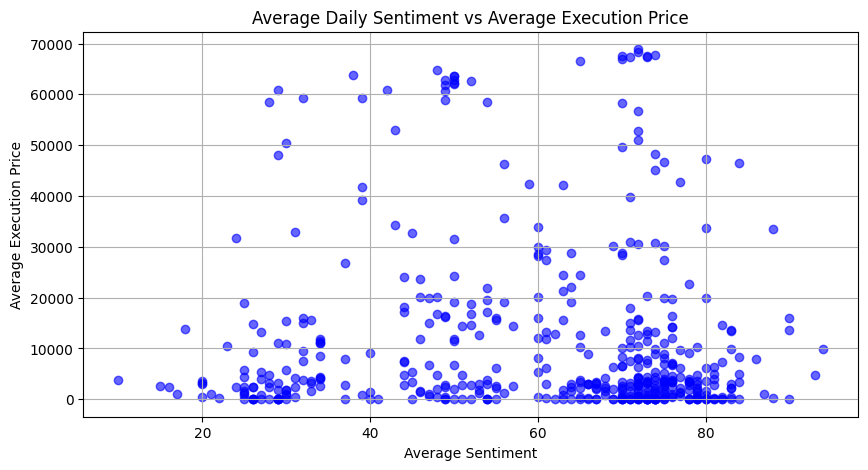

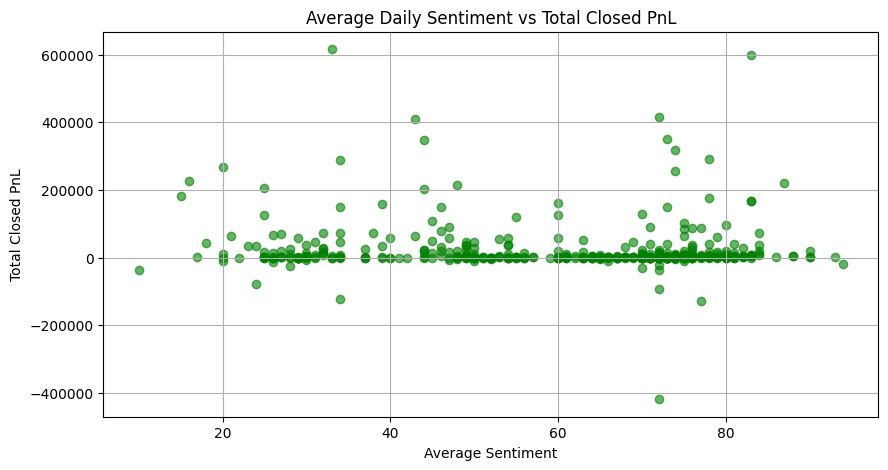

In [339]:
# Scatter plot: Average Daily Sentiment vs Average Execution Price
plt.figure(figsize=(10,5))
plt.scatter(merged_data['avg_sentiment'], merged_data['Execution Price'], color='blue', alpha=0.6)
plt.title('Average Daily Sentiment vs Average Execution Price')
plt.xlabel('Average Sentiment')
plt.ylabel('Average Execution Price')
plt.grid(True)
plt.show()

# Scatter plot: Average Daily Sentiment vs Total Closed PnL
plt.figure(figsize=(10,5))
plt.scatter(merged_data['avg_sentiment'], merged_data['Closed PnL'], color='green', alpha=0.6)
plt.title('Average Daily Sentiment vs Total Closed PnL')
plt.xlabel('Average Sentiment')
plt.ylabel('Total Closed PnL')
plt.grid(True)
plt.show()

* The first plot shows how the daily average sentiment relates to average execution prices. Each blue dot is one day, with sentiment on the x-axis and execution price on the y-axis. Most dots are at lower prices, with a few scattered higher, but there’s no clear trend. This suggests sentiment changes don’t strongly affect execution prices in this dataset.

* The second plot shows the relationship between daily sentiment and total closed PnL. Each green dot is a day, x-axis is sentiment, y-axis is total PnL. Most dots are near zero, meaning most trades break even regardless of sentiment. Some dots are far above or below zero, showing big gains or losses, but these extremes aren’t clearly linked to sentiment.

In [340]:
# Calculate correlation between sentiment and trading metrics
correlation = merged_data[['avg_sentiment', 'Execution Price', 'Closed PnL']].corr()
print("Correlation Matrix:\n", correlation)

Correlation Matrix:
                  avg_sentiment  Execution Price  Closed PnL
avg_sentiment         1.000000        -0.060238   -0.082642
Execution Price      -0.060238         1.000000   -0.024298
Closed PnL           -0.082642        -0.024298    1.000000


* Avg Sentiment vs Execution Price: -0.06, almost no correlation. Changes in sentiment don’t really match changes in execution price.

* Avg Sentiment vs Closed PnL: -0.08, again, very weak negative correlation. Sentiment doesn’t predict profits or losses in this dataset.

* Execution Price vs Closed PnL: -0.02, basically no relationship.

Overall the correlations are all very close to zero, meaning sentiment, prices, and PnL mostly move independently in this data.

#Model Prediction

Predictive analysis is not part of the assignment, but have included it just in case to see how sentiment data could be used for forecasting trading outcomes. The idea was to test simple models like Linear Regression and Random Forest to check if sentiment shows any predictive potential.

##Linear Regression

In [341]:
# Feature
X = merged_data[['avg_sentiment']]

# Target
y = merged_data['Closed PnL']

In [342]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [343]:
# Train Linear Regression mode
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

In [344]:
# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error (MAE): 39902.66
R^2 Score: 0.01


The Linear Regression model gave a Mean Absolute Error (MAE) of 39,902.66 and an R² score of 0.01, which means the model has almost no explanatory power and performs very poorly at predicting outcomes.

##Random Forest

In [345]:
# Features

X = merged_data[['avg_sentiment', 'Execution Price', 'Size USD']]

#Target
y = merged_data['Closed PnL']

In [346]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [347]:
# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test test
y_pred = rf_model.predict(X_test)


In [348]:
# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error (MAE): 32444.43
R^2 Score: -0.02


The Random Forest model resulted in a Mean Absolute Error (MAE) of 32,444.43 and an R² score of -0.02, showing that it performed even worse than a simple baseline, indicating it could not capture any meaningful relationship in the data.

For linear regression, only average sentiment was used as the feature to predict Closed PnL. Since sentiment alone doesn’t directly drive profits or losses, the model basically struggled and ended up with almost no predictive power.

For random forest, more features were added (sentiment, execution price, and trade size), but even then the results stayed poor. This suggests that the relationship between these features and PnL is either too weak, too noisy, or influenced by many other missing factors.

In short, both models underperformed because the features chosen don’t capture the real drivers of profit and loss, which indicates that sentiment and basic trade stats alone aren’t enough to explain PnL movements.

#Conclusion and Future ideas

Overall, the analysis showed how Bitcoin sentiment data and trading data can be processed, explored, and compared. The visualisations made it clear that both sentiment values and trading activity are often skewed and concentrated, with some noticeable outliers. When the datasets were merged, it allowed to study how sentiment connects with market metrics like execution price, trade size, and PnL — but the correlation turned out to be very weak. Scatter plots and correlation checks confirmed that sentiment on its own doesn’t strongly explain trading outcomes. Predictive models were also tried, but results showed that the chosen features weren’t enough to make reliable predictions.

## Future plans

For the future, this work can be improved by bringing in more features like market volatility, volume trends, external news events etc. Using larger datasets over longer time periods and applying advanced models like LSTMs could also give better insights.

Overall, the project sets a good foundation for understanding how sentiment data interacts with financial metrics, but there’s room to build deeper models and stronger connections in future studies.